<a href="https://colab.research.google.com/github/nathaliuw/TP_MACHINE_LEARNING_NB/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import matplotlib
import numpy as np
import tensorflow 
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [73]:
from google.colab import drive
import os

# Monter Google Drive dans Colab
drive.mount('/content/gdrive')

# Spécifier le chemin d'accès au dossier sur Google Drive
path = "/content/gdrive/MyDrive/Colab_Notebooks/cats_and_dogs/train"
path2 = "/content/gdrive/MyDrive/Colab_Notebooks/cats_and_dogs/test"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [103]:



train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,  # retournement horizontal de l'image
    vertical_flip=True,   
)

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',

    
)

Found 557 images belonging to 2 classes.


In [104]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [114]:
A=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30
)


Epoch 1/20
18/18 [==============================] - 32s 2s/step - loss: 0.5165 - accuracy: 0.7379
Epoch 2/20
18/18 [==============================] - 33s 2s/step - loss: 0.5175 - accuracy: 0.7469
Epoch 3/20
18/18 [==============================] - 34s 2s/step - loss: 0.4963 - accuracy: 0.7738
Epoch 4/20
18/18 [==============================] - 32s 2s/step - loss: 0.4718 - accuracy: 0.7864
Epoch 5/20
18/18 [==============================] - 33s 2s/step - loss: 0.4245 - accuracy: 0.7846
Epoch 6/20
18/18 [==============================] - 33s 2s/step - loss: 0.4264 - accuracy: 0.7917
Epoch 7/20
18/18 [==============================] - 32s 2s/step - loss: 0.4561 - accuracy: 0.7864
Epoch 8/20
18/18 [==============================] - 32s 2s/step - loss: 0.3987 - accuracy: 0.8330
Epoch 9/20
18/18 [==============================] - 32s 2s/step - loss: 0.3995 - accuracy: 0.8241
Epoch 10/20
18/18 [==============================] - 34s 2s/step - loss: 0.3423 - accuracy: 0.8600
Epoch 11/20
18/18 [

In [115]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_generator = train_datagen.flow_from_directory(
    path2,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',

)


Found 140 images belonging to 2 classes.


In [117]:
#preds = model.predict(test_generator)
loss, accuracy = model.evaluate(test_generator)

print('Loss on test set:', loss)
print('Accuracy on test set:', accuracy)

5/5 [==============================] - 4s 710ms/step - loss: 0.8304 - accuracy: 0.7000
Loss on test set: 0.8303678035736084
Accuracy on test set: 0.699999988079071


5/5 [==============================] - 4s 801ms/step


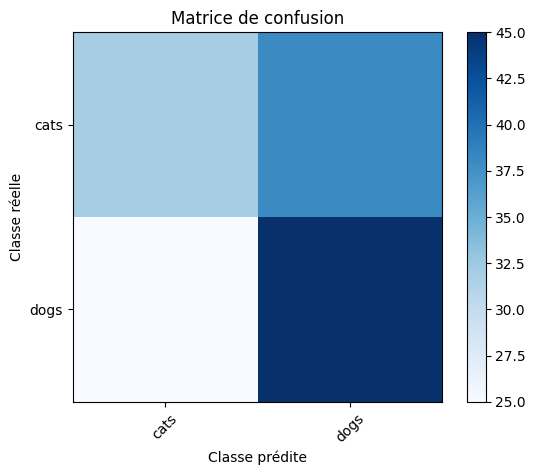

5/5 - 7s - loss: 0.8786 - accuracy: 0.6429 - 7s/epoch - 1s/step
Accuracy sur les données de test : 0.6428571343421936


In [118]:
# Prédiction sur les données de test
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)

# Affichage de la matrice de confusion
cm = confusion_matrix(test_generator.classes, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()

# Affichage de l'accuracy sur les données de test
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Accuracy sur les données de test :', test_acc)


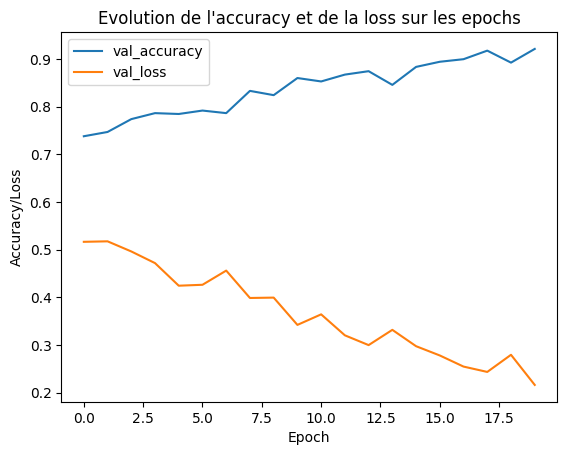

In [143]:
# Affichage de la courbe d'évolution de l'accuracy et de la loss sur les epochs
plt.plot(A.history['accuracy'])
plt.plot(A.history['loss'])
plt.title('Evolution de l\'accuracy et de la loss sur les epochs')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['val_accuracy', 'val_loss', 'train_loss', 'val_loss'], loc='upper left')
plt.show()

In [142]:
import urllib.request
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

# Lien de l'image à tester
image_url = "https://th.bing.com/th/id/OIP.-_udLh5NmihFevOszupuFAHaE8?w=262&h=180&c=7&r=0&o=5&dpr=1.5&pid=1.7"

# Téléchargement de l'image
urllib.request.urlretrieve(image_url, "test_image.jpg")

# Chargement de l'image
image = load_img("test_image.jpg", target_size=(150, 150))

# Conversion de l'image en tableau numpy
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# Normalisation de l'image
image = image/255.0

# Prédiction de la classe de l'image
result = model.predict(image)
if result > 0.5:
    print("dog")
else:
    print("cat")


1/1 [==============================] - 0s 36ms/step
dog
